# Load case combination for principal stress {#solution_combination}

This example shows how to get a principal stress load case combination
using DPF And highlight min/max values in the plot.


Import the `ansys.dpf.core` module, included examples file, and the
`DpfPlotter` module.


In [1]:
from ansys.dpf import core as dpf
from ansys.dpf.core import examples
from ansys.dpf.core.plotter import DpfPlotter

Open an example and print the `Model` object. The
`Model <ansys.dpf.core.model.Model>`{.interpreted-text role="class"}
class helps to organize access methods for the result by keeping track
of the operators and data sources used by the result file.

Printing the model displays this metadata:

-   Analysis type
-   Available results
-   Size of the mesh
-   Number of results


In [2]:
model = dpf.Model(examples.find_msup_transient())
print(model)

DPF Model
------------------------------
Transient analysis
Unit system: MKS: m, kg, N, s, V, A, degC
Physics Type: Mechanical
Available results:
     -  displacement: Nodal Displacement
     -  velocity: Nodal Velocity      
     -  acceleration: Nodal Acceleration
     -  reaction_force: Nodal Force   
     -  stress: ElementalNodal Stress 
     -  elemental_volume: Elemental Volume
     -  stiffness_matrix_energy: Elemental Energy-stiffness matrix
     -  artificial_hourglass_energy: Elemental Hourglass Energy
     -  thermal_dissipation_energy: Elemental thermal dissipation energy
     -  kinetic_energy: Elemental Kinetic Energy
     -  co_energy: Elemental co-energy
     -  incremental_energy: Elemental incremental energy
     -  elastic_strain: ElementalNodal Strain
------------------------------
DPF  Meshed Region: 
  393 nodes 
  40 elements 
  Unit: m 
  With solid (3D) elements
------------------------------
DPF  Time/Freq Support: 
  Number of sets: 20 
Cumulative     Time (

Get the stress tensor and `connect` time scoping. Make sure that you
define `dpf.locations.nodal` as the scoping location because labels are
supported only for nodal results.


In [3]:
stress_tensor = model.results.stress()
time_scope = dpf.Scoping()
time_scope.ids = [1, 2]
stress_tensor.inputs.time_scoping.connect(time_scope)
stress_tensor.inputs.requested_location.connect(dpf.locations.nodal)

This code performs solution combination on two load cases, LC1 and LC2.
You can access individual load cases as the fields of a fields container
for the stress tensor.


In [4]:
field_lc1 = stress_tensor.outputs.fields_container()[0]
field_lc2 = stress_tensor.outputs.fields_container()[1]

# Scale LC2 to -1.
stress_tensor_lc2_sc = dpf.operators.math.scale(field=field_lc2, ponderation=-1.0)

Add load cases.


In [5]:
stress_tensor_combi = dpf.operators.math.add(fieldA=field_lc1, fieldB=stress_tensor_lc2_sc)

Principal stresses are the Eigenvalues of the stress tensor. Use
principal invariants to get S1, S2, and S3.


In [6]:
p_inv = dpf.operators.invariant.principal_invariants()
p_inv.inputs.field.connect(stress_tensor_combi)

Print S1 (maximum principal stress).


In [7]:
print(p_inv.outputs.field_eig_1().data)

[ 9.89969387e+05  9.86979842e+05  6.46045019e+05  6.48932208e+05
  1.56976611e+04  2.38335566e+03  2.41021560e+03  1.55569949e+04
  6.46045018e+05  9.86979841e+05  2.41021536e+03  2.38335517e+03
  1.40298687e+06  1.40006022e+06  1.51284404e+04  2.32609985e+03
  1.40006022e+06  2.32609969e+03  1.88584658e+06  1.88308883e+06
  1.40245029e+04  2.28989834e+03  1.88308883e+06  2.28989838e+03
  2.43323154e+06  2.43097276e+06  1.13710605e+04  1.92191439e+03
  2.43097276e+06  1.92191428e+03  3.03740836e+06  3.03544790e+06
  8.36913086e+03  5.11051169e+03  3.03544790e+06  5.11051165e+03
  3.68414662e+06  3.68923438e+06 -4.49507141e+03 -3.86970389e+03
  3.68923438e+06 -3.86970407e+03  4.37493535e+06  4.36801081e+06
  4.62750323e+04  6.45366758e+04  4.36801080e+06  6.45366739e+04
  5.00024912e+06  5.15363818e+06 -1.72558410e+05 -1.68506344e+05
  5.15363818e+06 -1.68506347e+05  5.34040385e+06  6.25295625e+06
  9.15169741e+05  5.86694135e+05  6.25295625e+06  5.86694135e+05
  8.19942478e+06  5.11230

Get the meshed region.


In [8]:
mesh_set = model.metadata.meshed_region

Plot the results on the mesh. The `label_text_size` and
`label_point_size` arguments control the font size of the label.


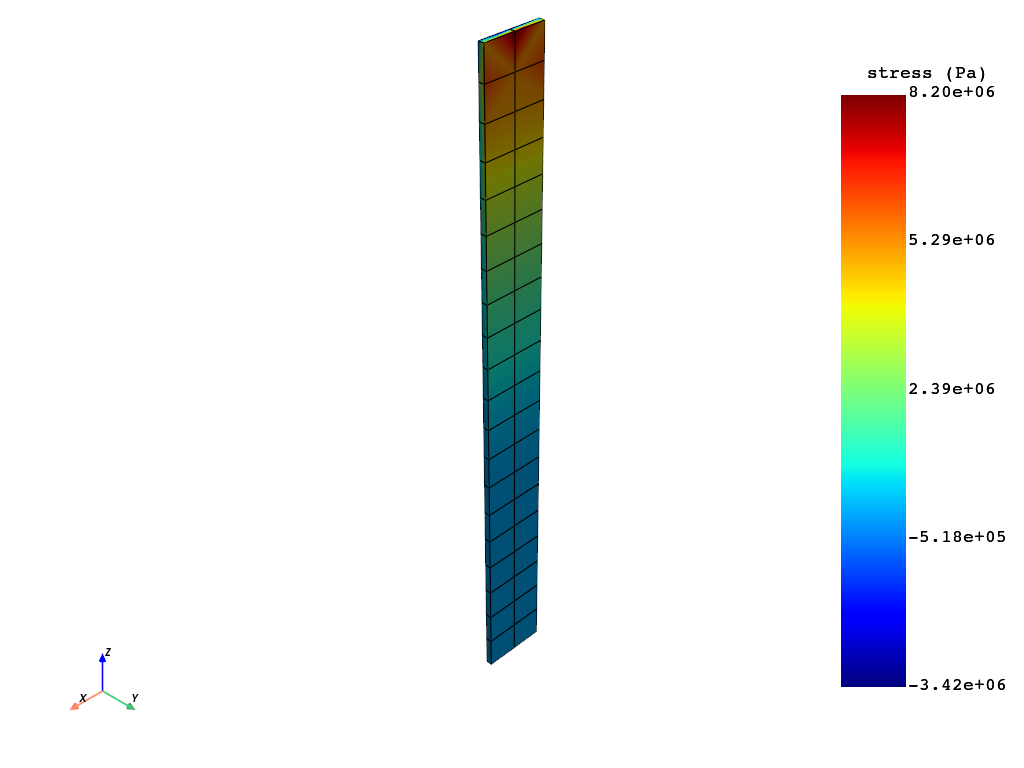

In [9]:
plot = DpfPlotter()
plot.add_field(p_inv.outputs.field_eig_1(), meshed_region=mesh_set)

# You can set the camera positions using the ``cpos`` argument.
# The three tuples in the list for the ``cpos`` argument represent the camera
# position, focal point, and view respectively.
plot.show_figure(show_axes=True)